# MMQ para dados climáticos

In [3]:
#imports das bibliotecas necessaria
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import scipy.stats as sp

### Dados

Os dados obtidos são de periodicidade mensal, começando a partir de janeiro 1980 e encerrando em dezembro de 2023.

In [4]:
#importar dados para regressão
df = pd.read_excel('Data/final_data.xlsx')
df

,Unnamed: 0,year,month,decimal date,temperature anomalies,Co2 ppm
0,0,1980,1,1980.042,0.52,338.55
1,1,1980,2,1980.125,0.43,339.26
2,2,1980,3,1980.208,0.47,339.59
3,3,1980,4,1980.292,0.34,339.99
4,4,1980,5,1980.375,0.28,340.44
...,...,...,...,...,...,...
523,523,2023,8,2023.625,NaN,416.65
524,524,2023,9,2023.708,NaN,417.06
525,525,2023,10,2023.792,NaN,418.73
526,526,2023,11,2023.875,NaN,420.34


In [5]:
#Dados para previsão
array_prev = [2034.0410, 2034.1257, 2034.2049, 2034.2896, 2034.3716, 2034.4563, 2034.5383, 2034.6230, 2034.7077, 2034.7896, 2034.8743, 2034.9563]

### Funções Auxiliares

In [6]:
def treinar_modelo(x_, y_):
    x_ = sm.add_constant(x_)
    model = sm.OLS(y_,x_)
    res = model.fit()
    return res   

In [7]:
def plotgrafico(xlabel, ylabel, label, linha, titulo = 'Gráfico'):
    graf, eix = plt.subplots()
    eix.scatter(x,y, color = 'black')
    eix.plot(x, linha , label = label, color = 'red')
    eix.set_ylabel(ylabel)
    eix.set_xlabel(xlabel)
    eix.set_title(titulo)
    eix.legend()
    graf.show()

## CO2xTempo

Aqui, serão realizados estudos relacionados a regressão linear simples e ajustes não lineares de dados mensais de concentração atmosférica do CO2 em partes por milhão ao longo do tempo.

In [8]:
#definir variáveis x e y
y = np.array(df['Co2 ppm'])
x = np.array(df['decimal date'])



In [9]:
#teste da distribuição normal
sp.shapiro(y)

ShapiroResult(statistic=0.94922935962677, pvalue=1.7407256192036868e-12)

### Linear 1

In [10]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = x
y_ = y 
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.644e+04
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:29:38   Log-Likelihood:                -1301.2
No. Observations:                 528   AIC:                             2606.
Df Residuals:                     526   BIC:                             2615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3357.2834     19.551   -171.718      0.0

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


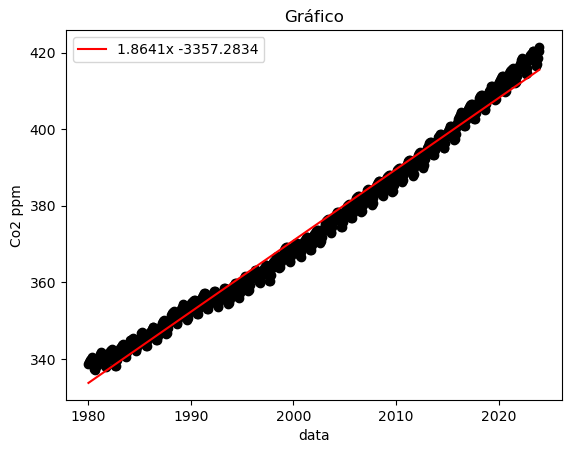

In [11]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}x {round(res.params[0],4)}'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )

#### Comentários

### Logarítmico 1

In [12]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = np.log(x)
y_ = y
res = treinar_modelo(x_,y_)
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 3.505e+04
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:29:39   Log-Likelihood:                -1311.3
No. Observations:                 528   AIC:                             2627.
Df Residuals:                     526   BIC:                             2635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.799e+04    151.486   -184.744      0.0

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


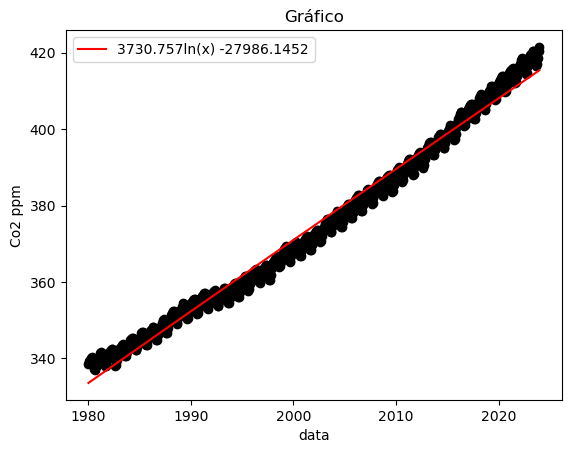

In [13]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}ln(x) {round(res.params[0],4)}'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )

#### Comentários

### Exponencial 1

In [14]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = x
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.396e+04
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:29:39   Log-Likelihood:                 1933.0
No. Observations:                 528   AIC:                            -3862.
Df Residuals:                     526   BIC:                            -3853.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0066      0.043    -93.722      0.0

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


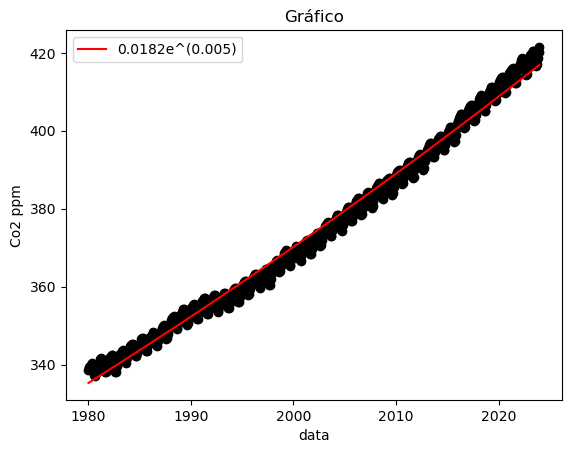

In [15]:
#Equação e Gráfico
equacaolabel = f'{round(np.exp(res.params[0]),4)}e^({round( res.params[1] ,4)})'
funApro = np.exp(res.params[0]) * np.exp(res.params[1] * x)
plotgrafico('data', 'Co2 ppm', equacaolabel, funApro  )

#### Comentários

### Potencial 1

In [16]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = np.log(x)
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.180e+04
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:29:40   Log-Likelihood:                 1922.3
No. Observations:                 528   AIC:                            -3841.
Df Residuals:                     526   BIC:                            -3832.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.5495      0.332   -209.732      0.0

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


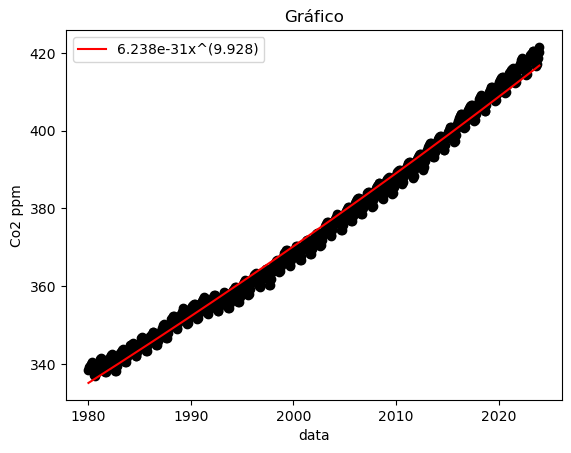

In [17]:
#Equação e Gráfico
equacaolabel = f'{np.exp(res.params[0]):.4g}x^({round(res.params[1],4):.4g})'
funApro = np.exp(res.params[0]) * (x ** res.params[1])
plotgrafico('data', 'Co2 ppm', equacaolabel, funApro  )

#### Comentários

### Polinomial 1

In [18]:
#Preparar model e treiná-lo, com teste t de student para significância
y_ = y
x_ = np.column_stack((x, x**2))
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.428e+04
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:29:40   Log-Likelihood:                -1015.0
No. Observations:                 528   AIC:                             2036.
Df Residuals:                     525   BIC:                             2049.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.092e+04   2005.379     30.379      0.0

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


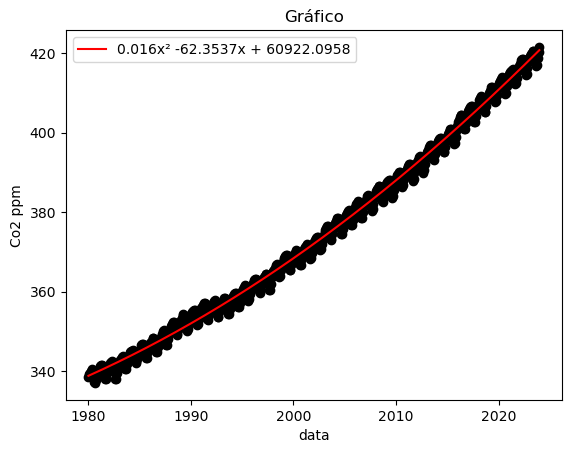

In [19]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[2],4)}x² {round(res.params[1],4)}x + {round(res.params[0],4)}'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )

#### Comentários

## Anomalias de Temperatura x Tempo

Aqui serão realizados estudos de regressão linear simples e ajustes não lineares a partir de dados de uma série temporal de anomalias de temperatura em terra e oceanos, que calcula as anomalias com base nos anos anteriores.

In [46]:
#definir variáveis x e y
y = np.array(df['temperature anomalies'])
x = np.array(df['decimal date'])
y

array([0.52, 0.43, 0.47, 0.34, 0.28, 0.33, 0.32, 0.34, 0.22, 0.25, 0.29,
       0.46, 0.09, 0.21, 0.05, 0.15, 0.17, 0.1 , 0.18, 0.11, 0.2 , 0.16,
       0.16, 0.44, 0.49, 0.45, 0.42, 0.28, 0.37, 0.3 , 0.23, 0.36, 0.42,
       0.22, 0.35, 0.23, 0.3 , 0.19, 0.3 , 0.12, 0.36, 0.1 , 0.17, 0.21,
       0.24, 0.16, 0.08, 0.01, 0.28, 0.04, 0.21, 0.14, 0.19, 0.19, 0.04,
       0.17, 0.17, 0.13, 0.11, 0.19, 0.28, 0.39, 0.3 , 0.25, 0.27, 0.17,
       0.17, 0.19, 0.12, 0.17, 0.13, 0.21, 0.34, 0.38, 0.2 , 0.26, 0.31,
       0.36, 0.48, 0.31, 0.4 , 0.33, 0.26, 0.45, 0.54, 0.46, 0.52, 0.45,
       0.46, 0.43, 0.36, 0.4 , 0.38, 0.36, 0.14, 0.28, 0.1 , 0.32, 0.32,
       0.31, 0.2 , 0.22, 0.3 , 0.33, 0.39, 0.31, 0.17, 0.41, 0.38, 0.38,
       0.75, 0.61, 0.51, 0.39, 0.41, 0.35, 0.32, 0.42, 0.41, 0.41, 0.4 ,
       0.5 , 0.37, 0.52, 0.42, 0.54, 0.48, 0.41, 0.42, 0.32, 0.3 , 0.29,
       0.43, 0.43, 0.47, 0.29, 0.34, 0.29, 0.14, 0.1 , 0.03, 0.06, 0.04,
       0.2 , 0.33, 0.39, 0.36, 0.32, 0.3 , 0.31, 0.

In [44]:
#teste da distribuição normal
sp.shapiro(y)

ShapiroResult(statistic=nan, pvalue=1.0)

### Linear 2

In [22]:
x_ = x
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 03 Sep 2024   Prob (F-statistic):                nan
Time:                        23:29:41   Log-Likelihood:                    nan
No. Observations:                 528   AIC:                               nan
Df Residuals:                     526   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


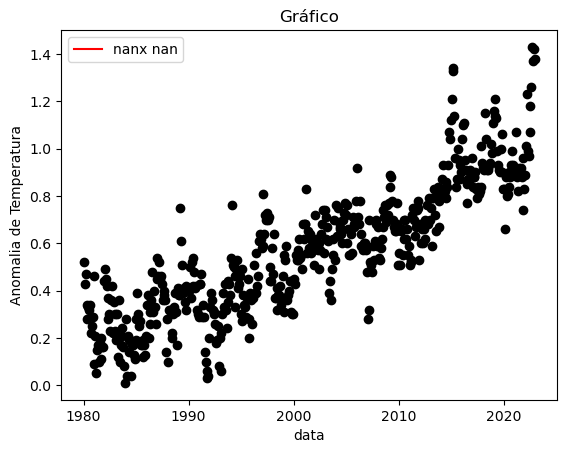

In [23]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}x {round(res.params[0],4)}'
plotgrafico('data', 'Anomalia de Temperatura', equacaolabel, res.fittedvalues )

#### Comentários

### Logarítmico 2

In [24]:
x_ = np.log(x)
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 03 Sep 2024   Prob (F-statistic):                nan
Time:                        23:29:41   Log-Likelihood:                    nan
No. Observations:                 528   AIC:                               nan
Df Residuals:                     526   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


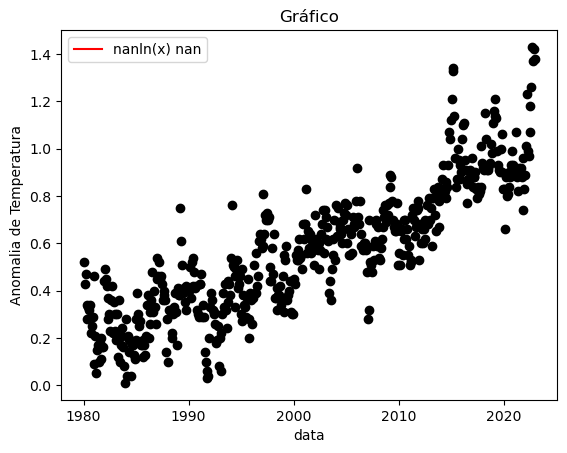

In [25]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}ln(x) {round(res.params[0],4)}'
plotgrafico('data', 'Anomalia de Temperatura', equacaolabel, res.fittedvalues )

#### Comentários

### Exponencial 2

In [26]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = x
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 03 Sep 2024   Prob (F-statistic):                nan
Time:                        23:29:42   Log-Likelihood:                    nan
No. Observations:                 528   AIC:                               nan
Df Residuals:                     526   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


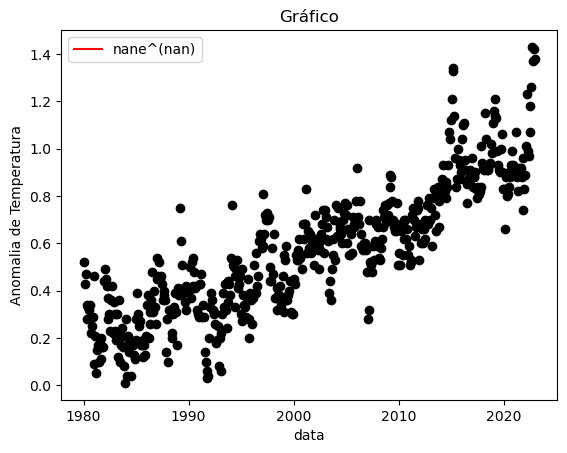

In [27]:
#Equação e Gráfico
equacaolabel = f'{round(np.exp(res.params[0]),4)}e^({round( res.params[1] ,4)})'
funApro = np.exp(res.params[0]) * np.exp(res.params[1] * x)
plotgrafico('data', 'Anomalia de Temperatura', equacaolabel, funApro )

#### Comentários

### Potencial 2

In [28]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = np.log(x)
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 03 Sep 2024   Prob (F-statistic):                nan
Time:                        23:29:42   Log-Likelihood:                    nan
No. Observations:                 528   AIC:                               nan
Df Residuals:                     526   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


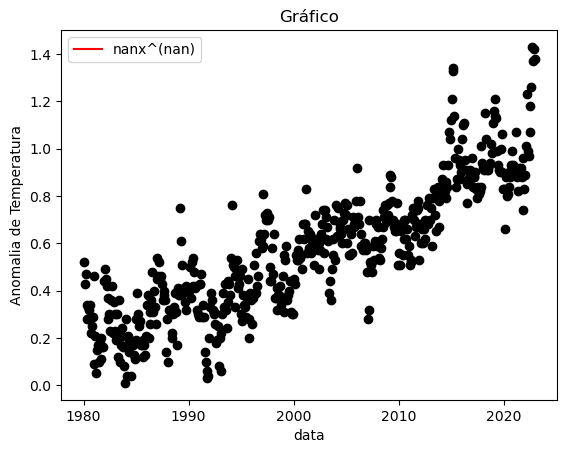

In [29]:
#Equação e Gráfico
equacaolabel = f'{np.exp(res.params[0]):.4g}x^({round(res.params[1],4):.4g})'
funApro = np.exp(res.params[0]) * (x ** res.params[1])
plotgrafico('data', 'Anomalia de Temperatura', equacaolabel, funApro )

#### Comentários

### Polinomial 2

In [30]:
x_ = x
y_ = y

x_p = np.column_stack((x_, x_**2))


x_p = sm.add_constant(x_p)
model = sm.OLS(y_,x_p)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 03 Sep 2024   Prob (F-statistic):                nan
Time:                        23:29:43   Log-Likelihood:                    nan
No. Observations:                 528   AIC:                               nan
Df Residuals:                     525   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


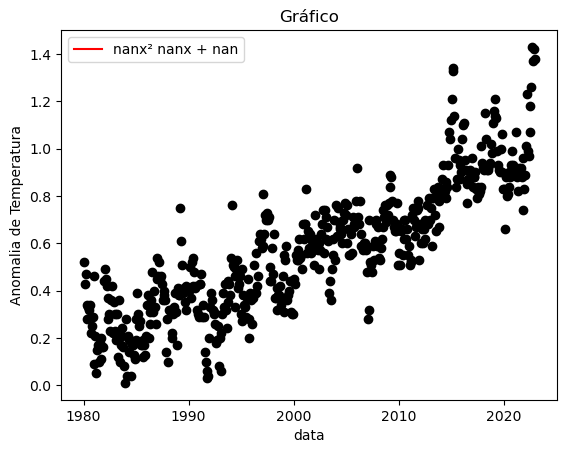

In [31]:
#Equação e Gráfico
equacaolabel = f'{res.params[2]:.4g}x² {round(res.params[1],4)}x + {round(res.params[0],4)}'
plotgrafico('data', 'Anomalia de Temperatura', equacaolabel, res.fittedvalues )

#### Comentários


## Anomalias de Temperatura x Co2

Aqui serão realizados estudos de regressão linear simples e ajustes não lineares a partir dos dados das anomalias de temperatura em terra e oceanos ao longo do tempo, mas em função das mudanças de concentração atmosférica do CO2 em partes por milhão ao longo do tempo

In [32]:
y = df['temperature anomalies']
x = df['Co2 ppm']

### Linear 3

In [33]:
x_ = x
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     temperature anomalies   R-squared:                         nan
Model:                               OLS   Adj. R-squared:                    nan
Method:                    Least Squares   F-statistic:                       nan
Date:                   Tue, 03 Sep 2024   Prob (F-statistic):                nan
Time:                           23:29:43   Log-Likelihood:                    nan
No. Observations:                    528   AIC:                               nan
Df Residuals:                        526   BIC:                               nan
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan 

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\3113635536.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equacaolabel = f'{round(res.params[1],4)}x + ({round(res.params[0],4)})'
C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


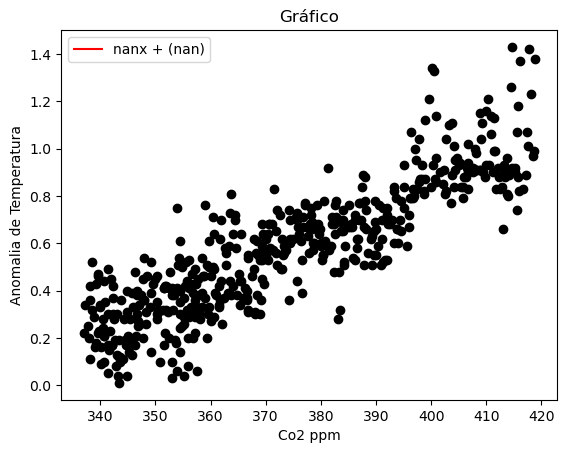

In [34]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}x + ({round(res.params[0],4)})'
plotgrafico('Co2 ppm', 'Anomalia de Temperatura', equacaolabel, res.fittedvalues )

#### Comentários

### Logarítmico 3

In [35]:
x_ = np.log(x)
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     temperature anomalies   R-squared:                         nan
Model:                               OLS   Adj. R-squared:                    nan
Method:                    Least Squares   F-statistic:                       nan
Date:                   Tue, 03 Sep 2024   Prob (F-statistic):                nan
Time:                           23:29:44   Log-Likelihood:                    nan
No. Observations:                    528   AIC:                               nan
Df Residuals:                        526   BIC:                               nan
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan 

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\892153944.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equacaolabel = f'{round(res.params[1],4)}ln(x) + ({round(res.params[0],4)})'
C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


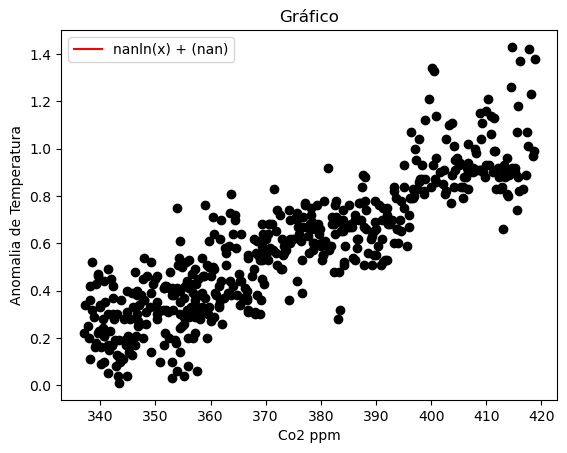

In [36]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}ln(x) + ({round(res.params[0],4)})'
plotgrafico('Co2 ppm', 'Anomalia de Temperatura', equacaolabel, res.fittedvalues )

#### Comentários

### Exponencial 3

In [37]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = x
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     temperature anomalies   R-squared:                         nan
Model:                               OLS   Adj. R-squared:                    nan
Method:                    Least Squares   F-statistic:                       nan
Date:                   Tue, 03 Sep 2024   Prob (F-statistic):                nan
Time:                           23:29:45   Log-Likelihood:                    nan
No. Observations:                    528   AIC:                               nan
Df Residuals:                        526   BIC:                               nan
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan 

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\2005021944.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equacaolabel = f'{round(np.exp(res.params[0]),4)}e^({round( res.params[1] ,4)})'
C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\2005021944.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  funApro = np.exp(res.params[0]) * np.exp(res.params[1] * x)
C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


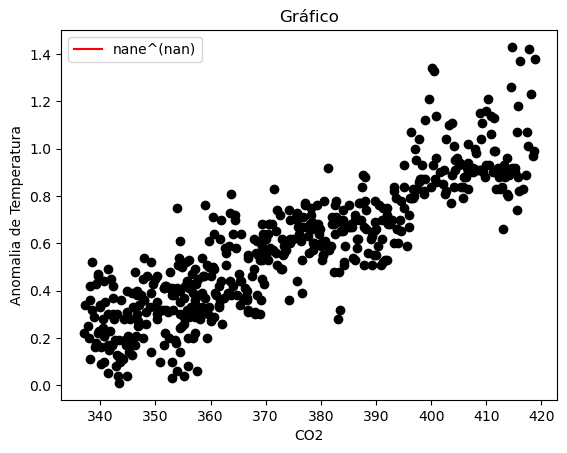

In [38]:
#Equação e Gráfico
equacaolabel = f'{round(np.exp(res.params[0]),4)}e^({round( res.params[1] ,4)})'
funApro = np.exp(res.params[0]) * np.exp(res.params[1] * x)
plotgrafico('CO2', 'Anomalia de Temperatura', equacaolabel, funApro )

#### Comentários

### Potencial 3

In [39]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = np.log(x)
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())


                              OLS Regression Results                             
Dep. Variable:     temperature anomalies   R-squared:                         nan
Model:                               OLS   Adj. R-squared:                    nan
Method:                    Least Squares   F-statistic:                       nan
Date:                   Tue, 03 Sep 2024   Prob (F-statistic):                nan
Time:                           23:29:45   Log-Likelihood:                    nan
No. Observations:                    528   AIC:                               nan
Df Residuals:                        526   BIC:                               nan
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan 

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1696591967.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equacaolabel = f'{np.exp(res.params[0]):.4g}x^({round(res.params[1],4):.4g})'
C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1696591967.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  funApro = np.exp(res.params[0]) * (x ** res.params[1])
C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


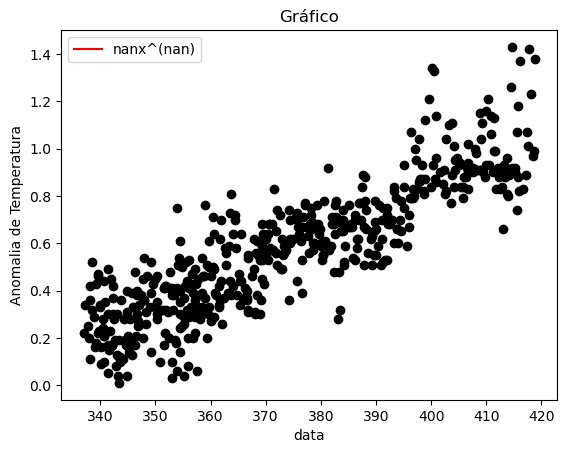

In [40]:
#Equação e Gráfico
equacaolabel = f'{np.exp(res.params[0]):.4g}x^({round(res.params[1],4):.4g})'
funApro = np.exp(res.params[0]) * (x ** res.params[1])
plotgrafico('data', 'Anomalia de Temperatura', equacaolabel, funApro  )

#### Comentários

### Polinomial 3

In [41]:
y_ = y
x_ = np.column_stack((x, x**2))
res = treinar_modelo(x_,y_)
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     temperature anomalies   R-squared:                         nan
Model:                               OLS   Adj. R-squared:                    nan
Method:                    Least Squares   F-statistic:                       nan
Date:                   Tue, 03 Sep 2024   Prob (F-statistic):                nan
Time:                           23:29:46   Log-Likelihood:                    nan
No. Observations:                    528   AIC:                               nan
Df Residuals:                        525   BIC:                               nan
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan 

C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\107650944.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equacaolabel = f'{res.params[2]:.4g}x² + {round(res.params[1],4)}x {round(res.params[0],4)}'
C:\Users\João Pedro Fernandes\AppData\Local\Temp\ipykernel_14300\1905830676.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


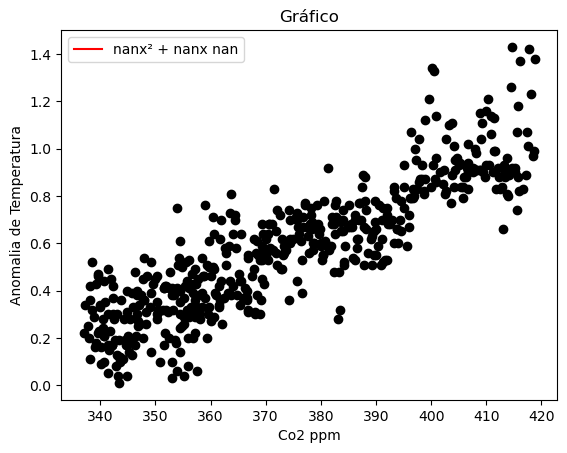

In [42]:
#Equação e Gráfico
equacaolabel = f'{res.params[2]:.4g}x² + {round(res.params[1],4)}x {round(res.params[0],4)}'
plotgrafico('Co2 ppm', 'Anomalia de Temperatura', equacaolabel, res.fittedvalues )

#### Comentários